In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [58]:
df = pd.read_parquet("../DATA/parquet/accident_data.parquet")

In [34]:
df.shape


(1048575, 34)

In [35]:
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,None,0.0,Serious,None,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,None,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,None,0.0,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,None,0.0,Slight,None,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,None,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,None,0.0,None,0.0,Slight,None,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No


### Object Columns

In [13]:
df.select_dtypes(exclude="number").columns

Index(['Accident_Index', '1st_Road_Class', '2nd_Road_Class',
       'Accident_Severity', 'Carriageway_Hazards', 'Date', 'Day_of_Week',
       'Junction_Control', 'Junction_Detail', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'LSOA_of_Accident_Location', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Special_Conditions_at_Site', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland'],
      dtype='object')

### Unwanted Columns

In [36]:
cols_to_drop = ["Accident_Index", "Location_Easting_OSGR", "Location_Northing_OSGR"]

In [37]:
df2 = df.copy()
df2.drop(columns=cols_to_drop, inplace=True)

# Change Non-numeric target column into numeric column
df2["Accident_Severity"] = df2["Accident_Severity"].map({"Slight": 1, "Serious": 2, "Fatal": 3})

df2.shape

(1048575, 31)

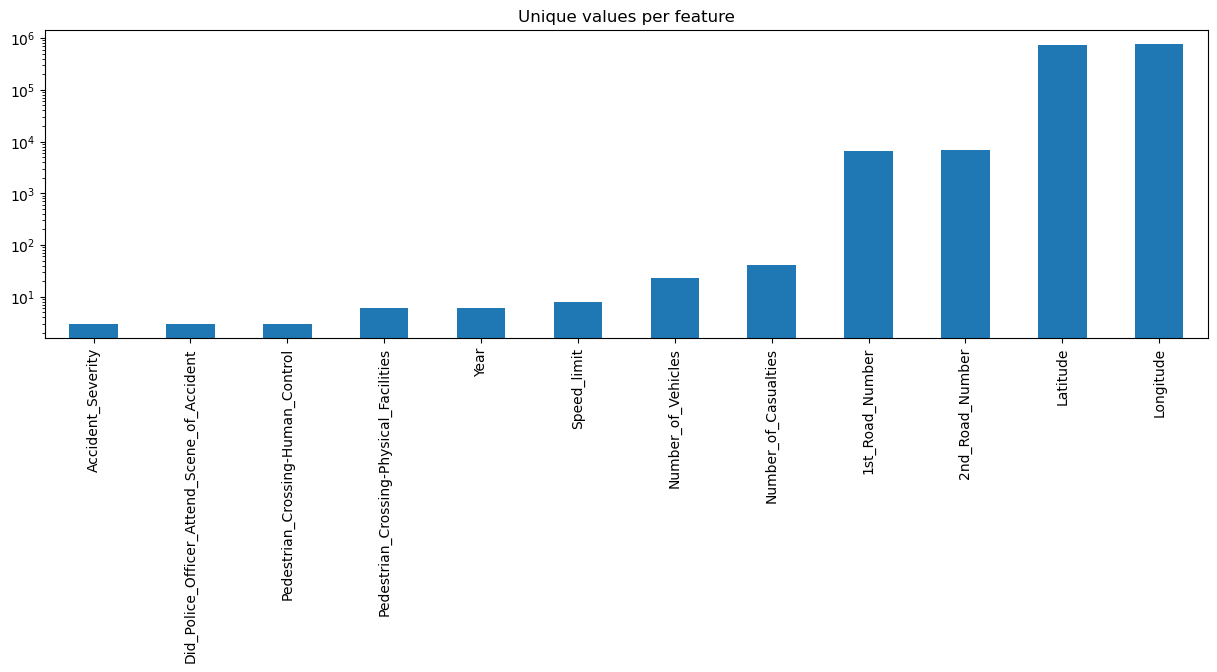

In [38]:
# For each numerical feature compute number of unique entries
unique_values = df2.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [39]:
unique_values.sort_values(ascending=False)[:10]

Longitude                                  774515
Latitude                                   739288
2nd_Road_Number                              6939
1st_Road_Number                              6552
Number_of_Casualties                           41
Number_of_Vehicles                             23
Speed_limit                                     8
Pedestrian_Crossing-Physical_Facilities         6
Year                                            6
Accident_Severity                               3
dtype: int64

### Continuous and Discrete Features

In [40]:
cont_cols, disc_cols = [], []

for key, val in dict(unique_values).items():
  disc_cols.append(key) if(val <= 10) else cont_cols.append(key)

len(cont_cols), len(disc_cols)

(6, 6)

#### Continuous Columns

In [41]:
cont_cols

['Number_of_Vehicles',
 'Number_of_Casualties',
 '1st_Road_Number',
 '2nd_Road_Number',
 'Latitude',
 'Longitude']

In [42]:
df2.loc[:, cont_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Vehicles,1048575.0,1.835030,0.718145,1.000000,1.000000,2.000000,2.000000,32.000000
Number_of_Casualties,1048575.0,1.359930,0.822365,1.000000,1.000000,1.000000,1.000000,68.000000
1st_Road_Number,1048573.0,1011.997007,1832.041637,0.000000,0.000000,125.000000,706.000000,9999.000000
2nd_Road_Number,1037772.0,387.000433,1316.672921,0.000000,0.000000,0.000000,0.000000,9999.000000
Latitude,1048464.0,52.572970,1.424463,49.914430,51.492443,52.343142,53.464070,60.757544
Longitude,1048463.0,-1.454537,1.391890,-7.516225,-2.371331,-1.435624,-0.244605,1.762010


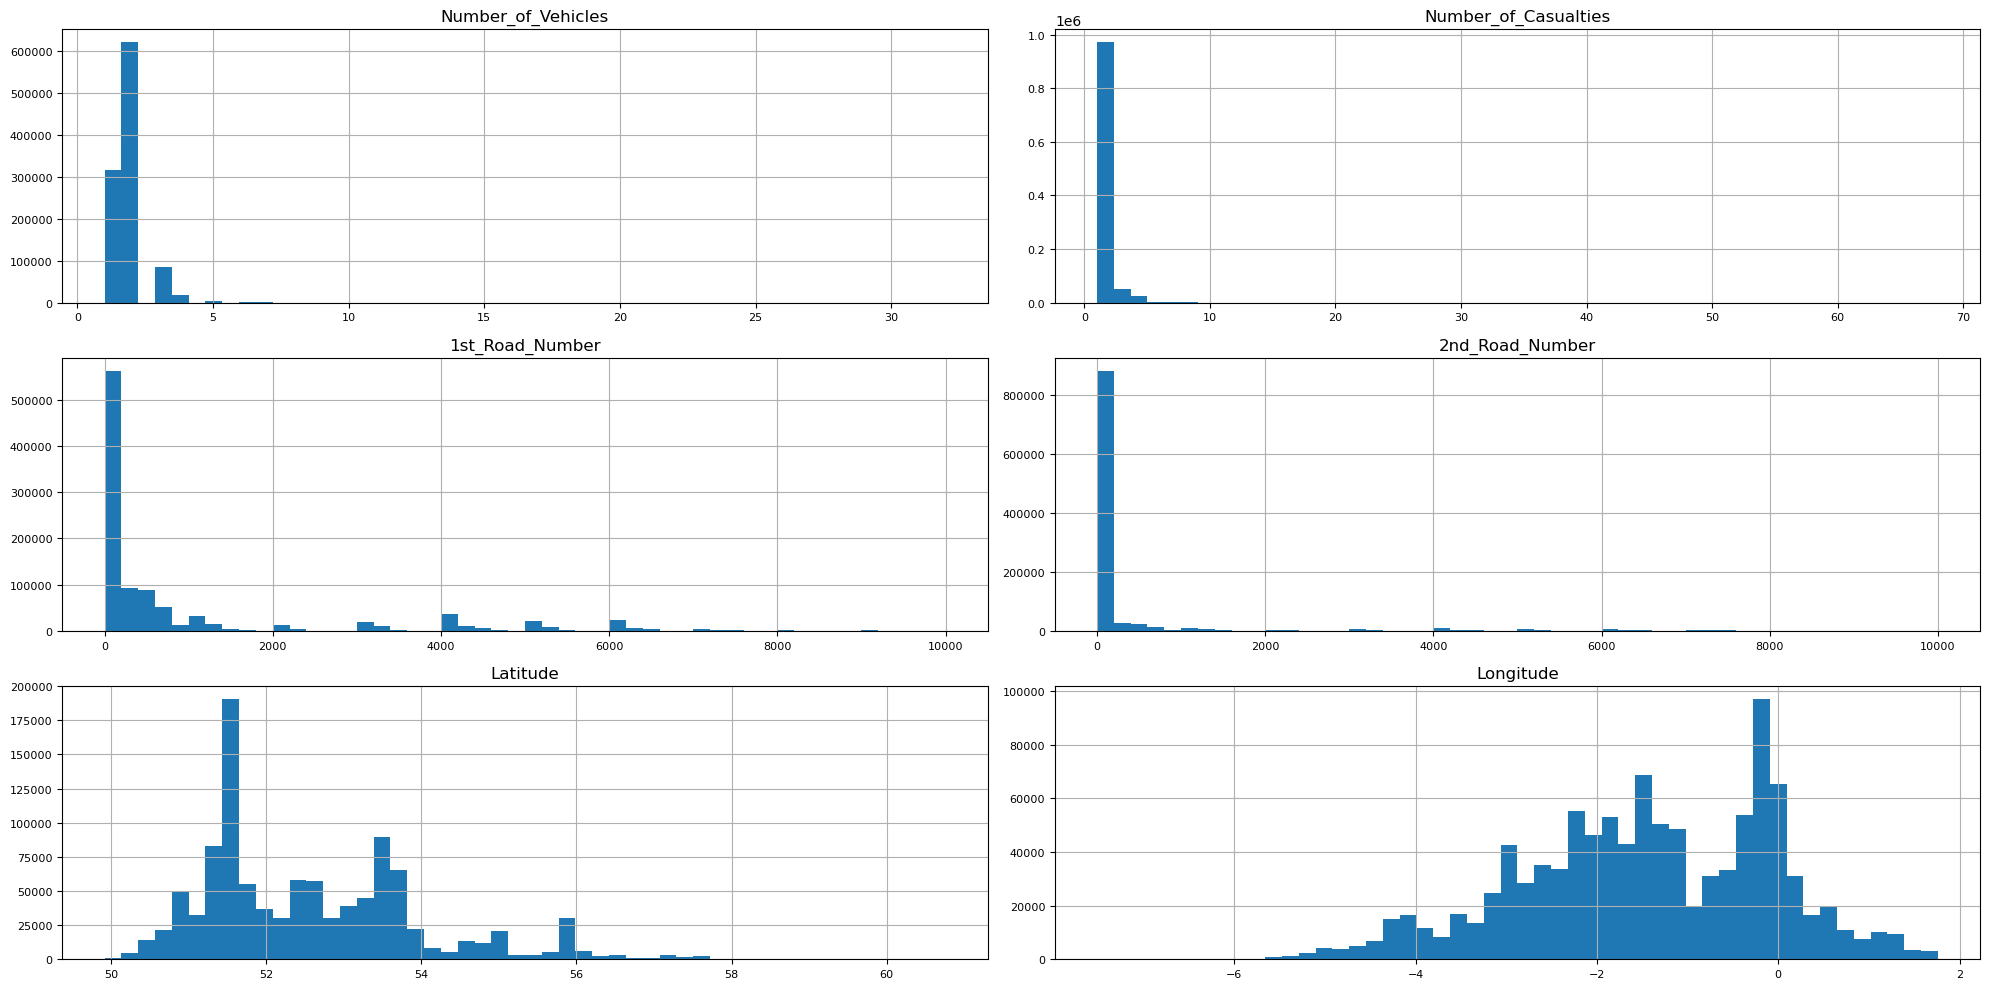

In [43]:
df2.loc[:, cont_cols].hist(figsize=(20, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout();

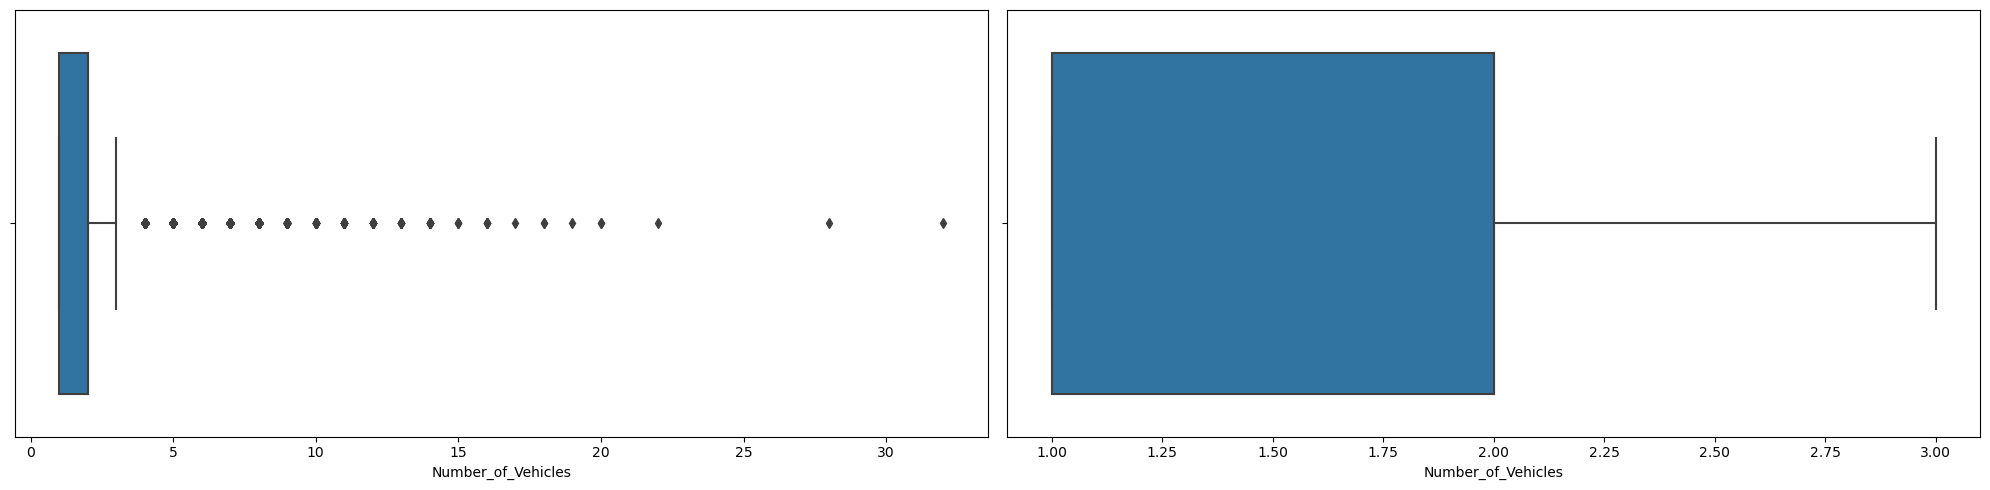

In [44]:
fig, ax = plt.subplots(ncols = 2, figsize=(20, 5))

sns.boxplot(x=df2["Number_of_Vehicles"], ax=ax[0])
sns.boxplot(x=df2["Number_of_Vehicles"], ax=ax[1], showfliers=False)
plt.tight_layout();

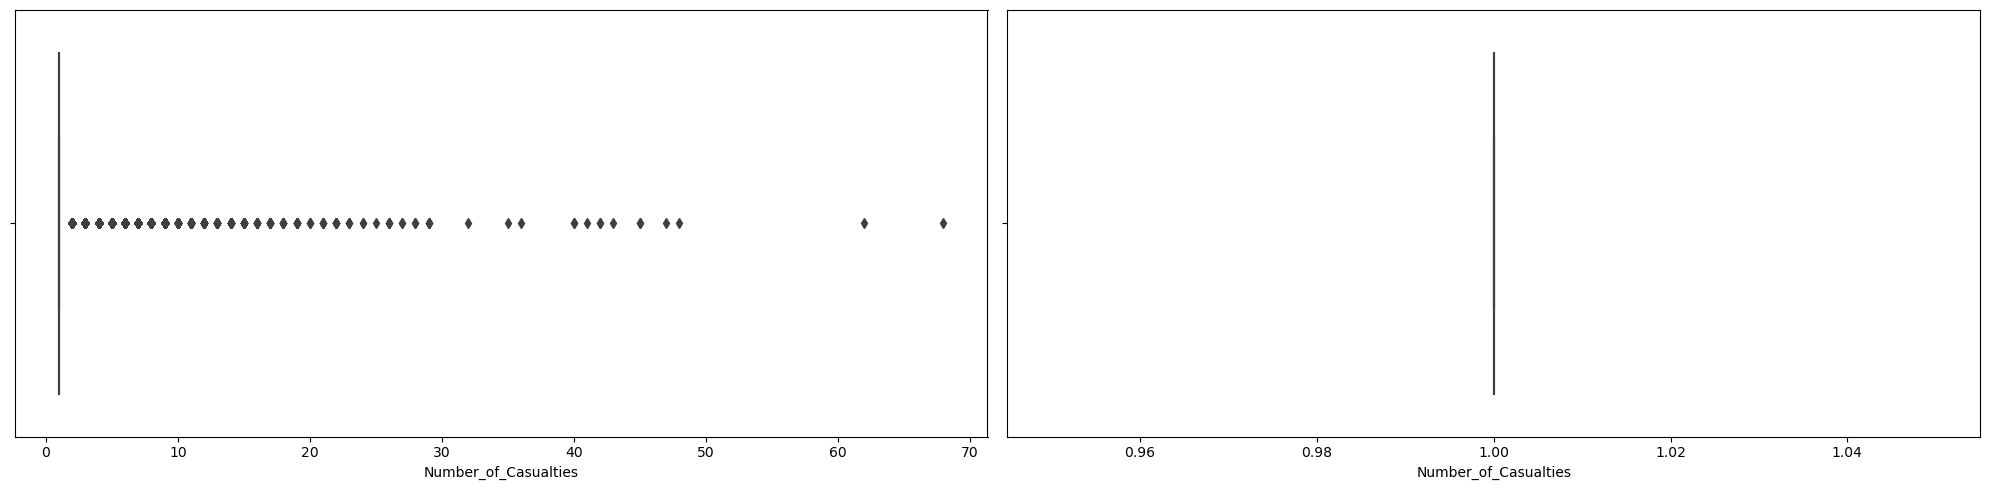

In [45]:
fig, ax = plt.subplots(ncols = 2, figsize=(20, 5))

sns.boxplot(x=df2["Number_of_Casualties"], ax=ax[0])
sns.boxplot(x=df2["Number_of_Casualties"], ax=ax[1], showfliers=False)
plt.tight_layout();

In [46]:
pd.DataFrame((df2["Number_of_Casualties"].value_counts()/len(df2))*100).T

,1,2,3,4,5,6,7,8,9,10,11,13,12,14,15,17,16,19,22,18,21,26,29,20,23,42,45,24,40,28,27,32,48,47,62,35,68,25,36,41,43
Number_of_Casualties,76.081444,16.504113,4.681306,1.70088,0.630284,0.235558,0.082588,0.034332,0.016785,0.00906,0.005436,0.003052,0.002956,0.001907,0.001621,0.00124,0.001049,0.000954,0.000763,0.000763,0.000477,0.000381,0.000381,0.000286,0.000286,0.000191,0.000191,0.000191,0.000191,0.000191,0.000191,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095


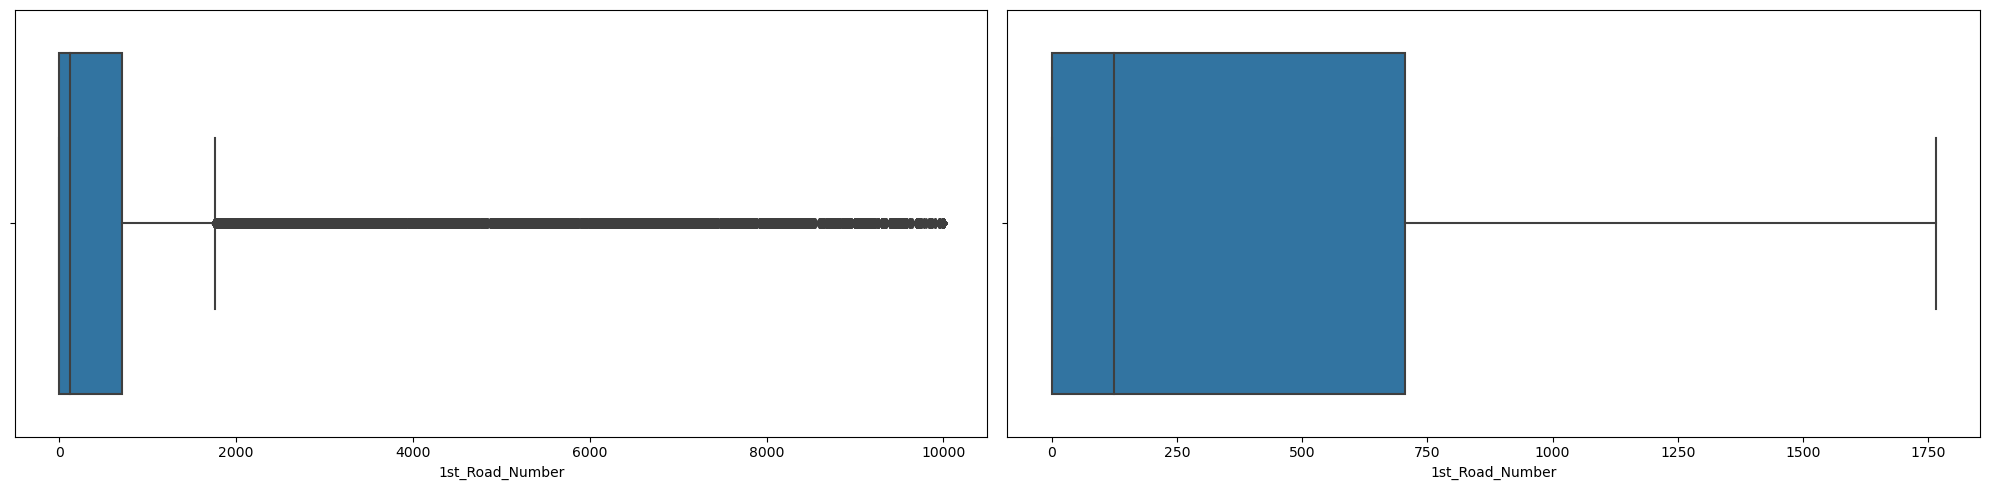

In [47]:
fig, ax = plt.subplots(ncols = 2, figsize=(20, 5))

sns.boxplot(x=df2["1st_Road_Number"], ax=ax[0])
sns.boxplot(x=df2["1st_Road_Number"], ax=ax[1], showfliers=False)
plt.tight_layout();

In [49]:
pd.DataFrame((df2["1st_Road_Number"].value_counts()/len(df2))*100).T

0.0      1.0      6.0       4.0       25.0      5.0     \
1st_Road_Number  27.355697  1.31941  1.14422  0.943089  0.675202  0.669289   

                   40.0      38.0      3.0       23.0      41.0      2.0     \
1st_Road_Number  0.646687  0.610448  0.543309  0.466538  0.451851  0.428009   

                  34.0      62.0      61.0      27.0      12.0      57.0    \
1st_Road_Number  0.41647  0.395489  0.375271  0.365353  0.346279  0.344563   

                   13.0      10.0      259.0     20.0     30.0      56.0    \
1st_Road_Number  0.340367  0.334931  0.330544  0.327874  0.32301  0.322914   

                   11.0      60.0      52.0      58.0      46.0      406.0   \
1st_Road_Number  0.318241  0.306988  0.291634  0.286103  0.272179  0.255203   

                  8.0       59.0      47.0     24.0     19.0      50.0    \
1st_Road_Number  0.25158  0.249291  0.245381  0.24128  0.23098  0.225353   

                   49.0      14.0      35.0      21.0      404.0     39.0    \
1st_Road_Number  0.224591  0.216198  0.212193  0.198269  0.195027  0.194645   

                   4020.0    48.0      167.0     205.0     308.0     217.0   \
1st_Road_Number  0.184632  0.184441  0.182247  0.178623  0.169277  0.167179   

                   320.0     45.0      15.0      65.0      638.0   18.0    \
1st_Road_Number  0.166607  0.166512  0.165653  0.160504  0.158787  0.1544   

                   470.0     315.0     9.0       361.0     26.0      31.0    \
1st_Road_Number  0.153923  0.152207  0.150299  0.149918  0.149059  0.147343   

                   28.0      90.0      503.0     329.0     105.0     4040.0  \
1st_Road_Number  0.142479  0.142098  0.140381  0.138283  0.137234  0.134468   

                   420.0     219.0     51.0      312.0     104.0     449.0   \
1st_Road_Number  0.133896  0.131989  0.131703  0.130844  0.129795  0.128174   

                   629.0     112.0     64.0      118.0     124.0     127.0   \
1st_Road_Number  0.128079  0.127983  0.127697  0.127602  0.126648  0.126648   

                   66.0     215.0     414.0     483.0     53.0      44.0    \
1st_Road_Number  0.125408  0.12455  0.123787  0.123596  0.119496  0.118542   

                   7.0       16.0      206.0     235.0     501.0     22.0    \
1st_Road_Number  0.117588  0.117016  0.116253  0.115681  0.114441  0.113487   

                   165.0     140.0     202.0   580.0     650.0     487.0   \
1st_Road_Number  0.112343  0.111294  0.110626  0.1091  0.109005  0.108814   

                   505.0     120.0     428.0    7201.0    33.0      7302.0  \
1st_Road_Number  0.108147  0.107479  0.107479  0.10643  0.106335  0.104427   

                  82.0     303.0     635.0     54.0      32.0      630.0   \
1st_Road_Number  0.10376  0.10376  0.101757  0.101662  0.100041  0.099564   

                   42.0      229.0     272.0     189.0     134.0     426.0   \
1st_Road_Number  0.099182  0.099087  0.098419  0.097847  0.097084  0.096512   

                   36.0     55.0      77.0      452.0   232.0     74.0    \
1st_Road_Number  0.096226  0.09594  0.095272  0.095177  0.0947  0.094509   

                   68.0      456.0    1000.0    43.0      400.0     338.0   \
1st_Road_Number  0.093365  0.092506  0.09222  0.091076  0.091076  0.090122   

                   226.0     435.0    458.0     107.0     63.0      4114.0  \
1st_Road_Number  0.090027  0.089073  0.08812  0.087833  0.087833  0.087643   

                   212.0     186.0     350.0     666.0     1010.0    69.0    \
1st_Road_Number  0.087452  0.087357  0.086403  0.086022  0.085354  0.085068   

                   461.0     214.0     37.0      222.0    71.0      671.0   \
1st_Road_Number  0.084877  0.084877  0.084782  0.084305  0.08421  0.082874   

                   647.0     444.0     143.0     129.0     607.0     386.0   \
1st_Road_Number  0.082493  0.081921  0.081825  0.081444  0.081253  0.080299   

                   682.0     614.0     421.0     390.0     109.0     511.0   \
1st_Ro

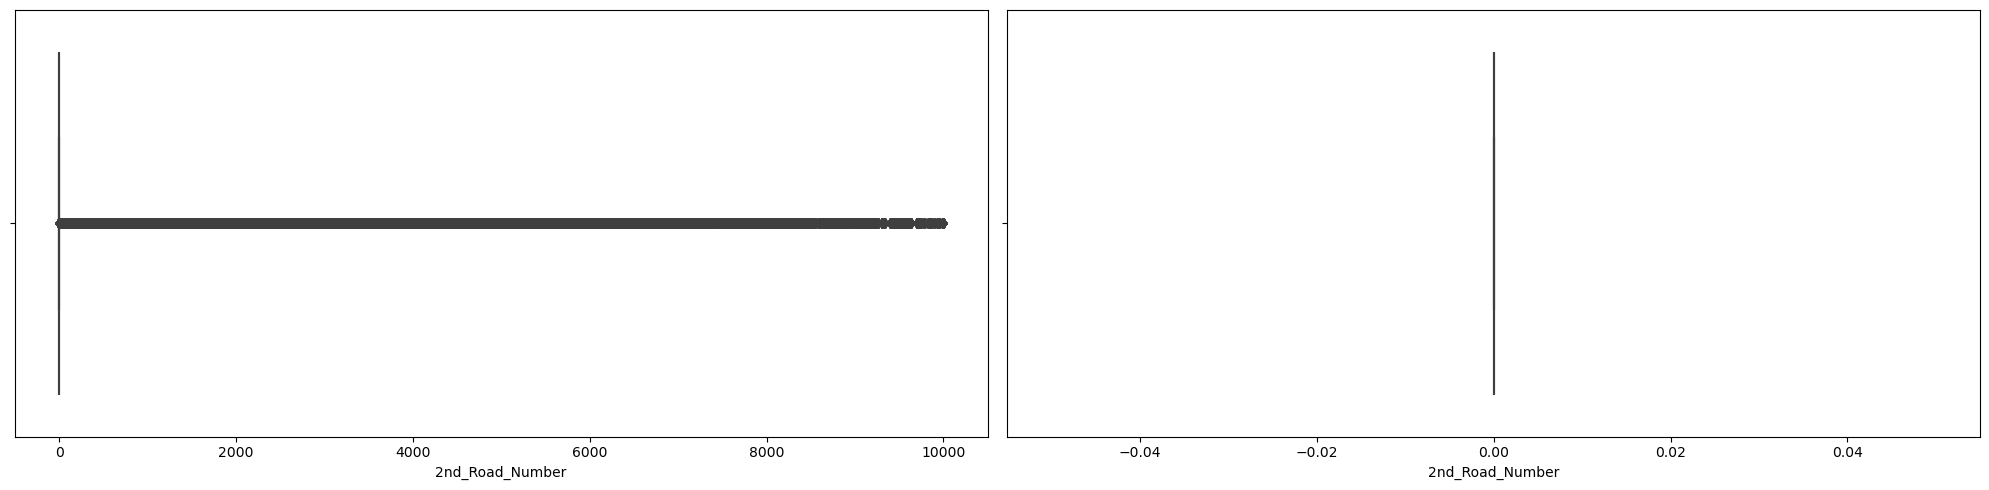

In [50]:
fig, ax = plt.subplots(ncols = 2, figsize=(20, 5))

sns.boxplot(x=df2["2nd_Road_Number"], ax=ax[0])
sns.boxplot(x=df2["2nd_Road_Number"], ax=ax[1], showfliers=False)
plt.tight_layout();

In [51]:
pd.DataFrame((df2["2nd_Road_Number"].value_counts()/len(df2))*100).T


0.0       1.0       6.0       4.0       40.0      5.0     \
2nd_Road_Number  77.489355  0.234604  0.191784  0.189018  0.132656  0.124264   

                   38.0    41.0      7201.0    3.0       7302.0    57.0    \
2nd_Road_Number  0.122547  0.1194  0.118923  0.117779  0.104523  0.099373   

                  58.0      34.0     235.0     61.0      23.0      10.0    \
2nd_Road_Number  0.09737  0.096226  0.09613  0.095272  0.094795  0.088406   

                   11.0      12.0      25.0      62.0      406.0    27.0    \
2nd_Road_Number  0.084972  0.084019  0.083637  0.083542  0.082016  0.07906   

                   326.0     426.0     50.0      19.0      13.0     2.0     \
2nd_Road_Number  0.072289  0.070477  0.069904  0.067616  0.066853  0.06628   

                  14.0      167.0     46.0      56.0      112.0     52.0    \
2nd_Road_Number  0.06628  0.065994  0.065613  0.063992  0.062752  0.060463   

                   45.0      20.0      205.0     126.0     47.0     503.0   \
2nd_Road_Number  0.059986  0.058651  0.057125  0.056648  0.056648  0.05331   

                   259.0     24.0      226.0     8.0       9999.0    4540.0  \
2nd_Road_Number  0.052071  0.051594  0.051498  0.050736  0.050545  0.050449   

                   404.0     104.0     60.0      21.0      4040.0    49.0    \
2nd_Road_Number  0.050259  0.049973  0.049877  0.049305  0.048924  0.046539   

                   118.0     30.0      308.0     18.0      35.0      59.0    \
2nd_Road_Number  0.046539  0.046539  0.046063  0.046063  0.045586  0.044251   

                   217.0     51.0      124.0     105.0     54.0      189.0   \
2nd_Road_Number  0.043869  0.043297  0.043201  0.042915  0.041008  0.040817   

                   414.0    136.0    236.0     501.0     3220.0    107.0   \
2nd_Road_Number  0.040436  0.04015  0.04015  0.040054  0.040054  0.039768   

                  53.0      215.0     15.0      500.0     65.0     435.0   \
2nd_Road_Number  0.03891  0.038719  0.037479  0.036716  0.036335  0.03624   

                   452.0     202.0     312.0   55.0      7002.0    32.0    \
2nd_Road_Number  0.036144  0.035858  0.035095   0.035  0.034714  0.034428   

                   31.0      400.0     4020.0    6010.0    33.0      219.0   \
2nd_Road_Number  0.033951  0.033093  0.032711  0.032234  0.031853  0.031662   

                   630.0     26.0      123.0     135.0     39.0      127.0   \
2nd_Road_Number  0.031376  0.031281  0.030899  0.030804  0.030708  0.030518   

                   444.0     66.0      580.0     7408.0    206.0     9.0     \
2nd_Road_Number  0.029659  0.029659  0.029469  0.029087  0.029087  0.028801   

                   627.0     408.0     90.0      134.0     232.0     43.0    \
2nd_Road_Number  0.028706  0.028324  0.028229  0.027847  0.027847  0.027657   

                   650.0     638.0     214.0     44.0      420.0     629.0   \
2nd_Road_Number  0.027657  0.027561  0.027275  0.026608  0.026512  0.026512   

                   335.0     1069.0    184.0     504.0     316.0     320.0   \
2nd_Road_Number  0.026417  0.026226  0.026226  0.026131  0.026131  0.026035   

                   449.0    48.0      272.0     125.0     315.0     16.0    \
2nd_Road_Number  0.026035  0.02594  0.025845  0.025654  0.025654  0.025558   

                   505.0     109.0     36.0      42.0      186.0     102.0   \
2nd_Road_Number  0.025368  0.025368  0.025368  0.025272  0.024986  0.024891   

                   117.0     6177.0    106.0     412.0   212.0   1098.0  \
2nd_Road_Number  0.024891  0.024796  0.024796  0.024796  0.0247  0.0247   

                   361.0     411.0     437.0     602.0     461.0     337.0   \
2nd_Road_Number  0.024605  0.024414  0.024223  0.024033  0.023842  0.023747   

                   80.0      183.0     453.0     322.0     22.0      225.0   \
2nd_Road_Number  0.023651  0.023651  0.023556  0.023556  0.023556  0.023365   

                   483.0    100.0    130.0    200.0     63.0      72.0    \
2nd_R

TypeError: Horizontal orientation requires numeric `x` variable.

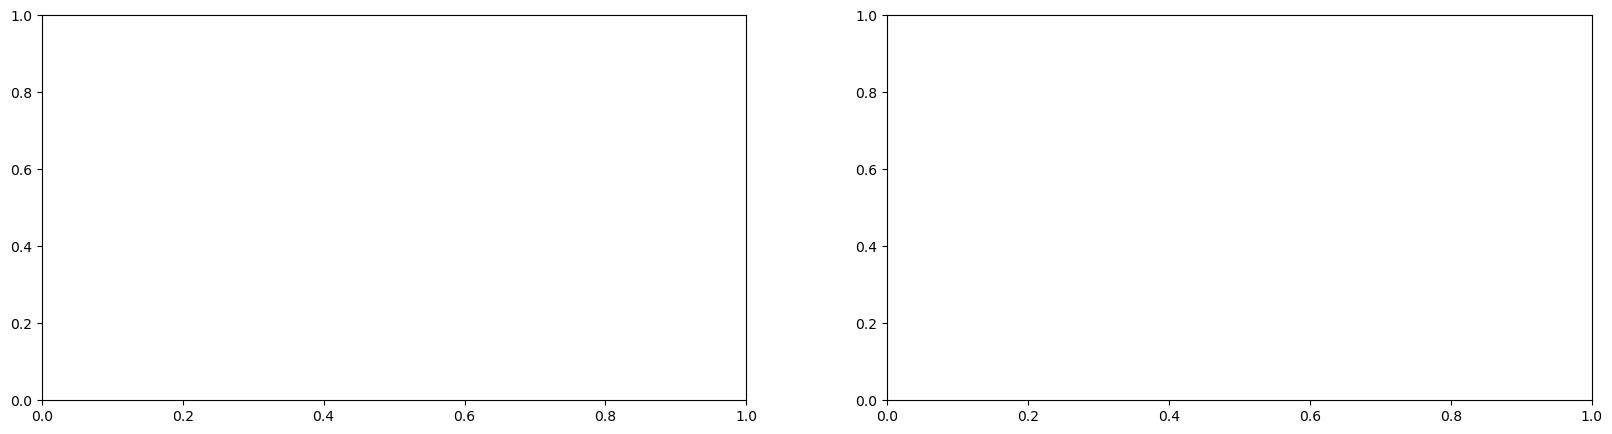

In [52]:
fig, ax = plt.subplots(ncols = 2, figsize=(20, 5))

sns.boxplot(x=df2["LSOA_of_Accident_Location"], ax=ax[0])
sns.boxplot(x=df2["LSOA_of_Accident_Location"], ax=ax[1], showfliers=False)
plt.tight_layout();

In [53]:
sorted(df2["LSOA_of_Accident_Location"])[:10]

TypeError: '<' not supported between instances of 'NoneType' and 'str'

**Observation:** 7 entries with negative numbers

In [54]:
df2[df2["LSOA_of_Accident_Location"] < 0]

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
df2[df2["LSOA_of_Accident_Location"] > 0].head()

In [59]:
df_accident = pd.read_parquet("../DATA/parquet/accident_data.parquet")

In [60]:
check_list = list(df[df["LSOA_of_Accident_Location"] < 0]["Accident_Index"])
check_list

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
for val in check_list:
  print(df_accident[df_accident["Accident_Index"] == val]["LSOA_of_Accident_Location"])

**Observation** Before imputing, the negative values were nan values. Garbage values

In [61]:
pd.DataFrame((df_accident["2nd_Road_Number"].value_counts()/len(df2))*100).T

0.0       1.0       6.0       4.0       40.0      5.0     \
2nd_Road_Number  77.489355  0.234604  0.191784  0.189018  0.132656  0.124264   

                   38.0    41.0      7201.0    3.0       7302.0    57.0    \
2nd_Road_Number  0.122547  0.1194  0.118923  0.117779  0.104523  0.099373   

                  58.0      34.0     235.0     61.0      23.0      10.0    \
2nd_Road_Number  0.09737  0.096226  0.09613  0.095272  0.094795  0.088406   

                   11.0      12.0      25.0      62.0      406.0    27.0    \
2nd_Road_Number  0.084972  0.084019  0.083637  0.083542  0.082016  0.07906   

                   326.0     426.0     50.0      19.0      13.0     2.0     \
2nd_Road_Number  0.072289  0.070477  0.069904  0.067616  0.066853  0.06628   

                  14.0      167.0     46.0      56.0      112.0     52.0    \
2nd_Road_Number  0.06628  0.065994  0.065613  0.063992  0.062752  0.060463   

                   45.0      20.0      205.0     126.0     47.0     503.0   \
2nd_Road_Number  0.059986  0.058651  0.057125  0.056648  0.056648  0.05331   

                   259.0     24.0      226.0     8.0       9999.0    4540.0  \
2nd_Road_Number  0.052071  0.051594  0.051498  0.050736  0.050545  0.050449   

                   404.0     104.0     60.0      21.0      4040.0    49.0    \
2nd_Road_Number  0.050259  0.049973  0.049877  0.049305  0.048924  0.046539   

                   118.0     30.0      308.0     18.0      35.0      59.0    \
2nd_Road_Number  0.046539  0.046539  0.046063  0.046063  0.045586  0.044251   

                   217.0     51.0      124.0     105.0     54.0      189.0   \
2nd_Road_Number  0.043869  0.043297  0.043201  0.042915  0.041008  0.040817   

                   414.0    136.0    236.0     501.0     3220.0    107.0   \
2nd_Road_Number  0.040436  0.04015  0.04015  0.040054  0.040054  0.039768   

                  53.0      215.0     15.0      500.0     65.0     435.0   \
2nd_Road_Number  0.03891  0.038719  0.037479  0.036716  0.036335  0.03624   

                   452.0     202.0     312.0   55.0      7002.0    32.0    \
2nd_Road_Number  0.036144  0.035858  0.035095   0.035  0.034714  0.034428   

                   31.0      400.0     4020.0    6010.0    33.0      219.0   \
2nd_Road_Number  0.033951  0.033093  0.032711  0.032234  0.031853  0.031662   

                   630.0     26.0      123.0     135.0     39.0      127.0   \
2nd_Road_Number  0.031376  0.031281  0.030899  0.030804  0.030708  0.030518   

                   444.0     66.0      580.0     7408.0    206.0     9.0     \
2nd_Road_Number  0.029659  0.029659  0.029469  0.029087  0.029087  0.028801   

                   627.0     408.0     90.0      134.0     232.0     43.0    \
2nd_Road_Number  0.028706  0.028324  0.028229  0.027847  0.027847  0.027657   

                   650.0     638.0     214.0     44.0      420.0     629.0   \
2nd_Road_Number  0.027657  0.027561  0.027275  0.026608  0.026512  0.026512   

                   335.0     1069.0    184.0     504.0     316.0     320.0   \
2nd_Road_Number  0.026417  0.026226  0.026226  0.026131  0.026131  0.026035   

                   449.0    48.0      272.0     125.0     315.0     16.0    \
2nd_Road_Number  0.026035  0.02594  0.025845  0.025654  0.025654  0.025558   

                   505.0     109.0     36.0      42.0      186.0     102.0   \
2nd_Road_Number  0.025368  0.025368  0.025368  0.025272  0.024986  0.024891   

                   117.0     6177.0    106.0     412.0   212.0   1098.0  \
2nd_Road_Number  0.024891  0.024796  0.024796  0.024796  0.0247  0.0247   

                   361.0     411.0     437.0     602.0     461.0     337.0   \
2nd_Road_Number  0.024605  0.024414  0.024223  0.024033  0.023842  0.023747   

                   80.0      183.0     453.0     322.0     22.0      225.0   \
2nd_Road_Number  0.023651  0.023651  0.023556  0.023556  0.023556  0.023365   

                   483.0    100.0    130.0    200.0     63.0      72.0    \
2nd_R

In [62]:
df_exp1 = pd.DataFrame()
df_exp1["2nd_Road_Number_before"] = df_accident["2nd_Road_Number"]
df_exp1["2nd_Road_Number_after"] = df2["2nd_Road_Number"]

df_exp1.describe()

,2nd_Road_Number_before,2nd_Road_Number_after
count,1.037772e+06,1.037772e+06
mean,3.870004e+02,3.870004e+02
std,1.316673e+03,1.316673e+03
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,9.999000e+03,9.999000e+03


### Discrete Features

fig, axes = plt.subplots(round(len(df2.loc[:, disc_cols].columns) / 4), 4, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df2.loc[:, disc_cols].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df2.loc[:, disc_cols].columns[i], alpha=0.7, data=df2.loc[:, disc_cols], ax=ax)

fig.tight_layout()

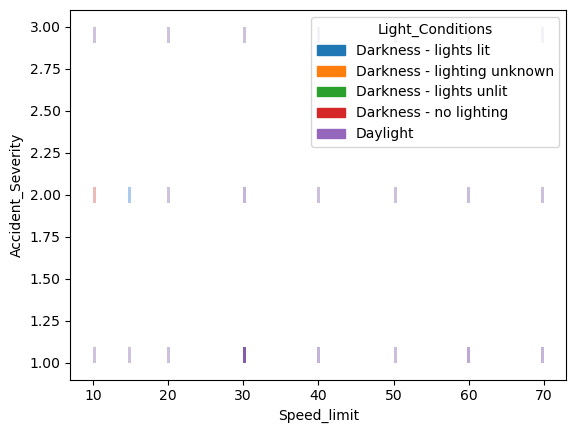

In [67]:
sns.histplot(x="Speed_limit", y="Accident_Severity", data=df2, hue="Light_Conditions");

**Convert to HTML**

In [ ]:
# %%shell
# jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/basic.ipynb"